In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module frome the datetime library
import time
from datetime import datetime

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import the API key
from config import weather_api_key

In [4]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# add the laltitudes and longitudes  to a list
coordinates = list(lat_lngs)

In [6]:
# use the print() function to display the latitude and longitude combinations
for coordinate in coordinates: 
    print(coordinate[0], coordinate[1])

-16.29514757579406 -126.59124926215634
42.496478795517305 42.7443622814977
25.422822049357023 -36.211338951713714
-56.39006035605761 38.357043307001476
-6.4072901917677285 -151.78274086226222
-19.4491475710267 -38.76159133014983
-85.6443874522768 -49.27140784910182
-16.14749424303409 -136.40540986843453
-74.80550551646039 -118.59204726468762
-77.36117073673545 -25.06253993128891
30.341870404097946 -157.29961653624605
40.20996659916233 171.75089718186518
57.598014819502055 169.4095392827112
25.137275976360954 -41.470751495523814
18.1323043434831 -1.6774248976261106
-8.706361556376095 -117.55775536623099
-68.6072873554318 143.7966558218498
-80.91795868680191 14.304613008434103
66.93549928193994 54.91307404455961
-2.1014977449323453 -125.70590498172157
-20.767502027004184 -94.02754858779196
43.29162348855499 -11.892444989115859
-65.6334423535468 131.18617890948173
-65.63359749662915 53.880004126305636
62.0375064366072 -136.25850344237696
80.87574503048862 30.237852347617178
9.429118961978

In [7]:
# import the requests Library
import requests

In [8]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bcf4cc3748dbd7876c0470d5b0c3ef63


In [9]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude comibination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

620

In [10]:
# Create an empty list to hold the weather data
city_data = []

# PRint the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
##for i in range(len(cities)):

# Insead of 2 for loops use enumerate instead of range(len())
# Use enumerate() method as alternative way to iterate through a list and retrieve both index and city
#Loop through all the cities in the list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
        # pause for 60 seconds (were using the free version)
        time.sleep(60)
        
    #Create endpoint URL with each city
     # Remove blank spaces in the city name with .replace() 
    city_url = url + "&q=" + city.replace(" ", "+")
    #print(city_url)
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    #Run an API Request for each of the cities
    # Creating a Try/ Except / Pass Block
    
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    #if an ERROR is experienced, skip the city
    except:
        print("City not found. Skipping...")
            
        #pass statement keeps it rolling
        pass
        
#Indicate that the Data Loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")
    
    
   
        
       
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | tskaltubo
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | sao mateus
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | tombouctou
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | hualmay
Processing Record 17 of Set 1 | muros
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | mayo
Processing Record 21 of Set 1 | berlevag
Processing Record 22 of Set 1 | hilo
Processing Record

Processing Record 190 of Set 4 | inhambane
Processing Record 191 of Set 4 | kodiak
Processing Record 192 of Set 4 | santa barbara
Processing Record 193 of Set 4 | mount gambier
Processing Record 194 of Set 4 | burnie
Processing Record 195 of Set 4 | yulara
Processing Record 196 of Set 4 | kuche
City not found. Skipping...
Processing Record 197 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 198 of Set 4 | haines junction
Processing Record 199 of Set 4 | miramar
Processing Record 200 of Set 4 | aykhal
Processing Record 201 of Set 4 | miasskoye
Processing Record 202 of Set 4 | kaitangata
Processing Record 203 of Set 4 | kutum
Processing Record 205 of Set 5 | yamada
Processing Record 206 of Set 5 | mount isa
Processing Record 207 of Set 5 | agva
City not found. Skipping...
Processing Record 208 of Set 5 | bacolod
Processing Record 209 of Set 5 | neiafu
Processing Record 210 of Set 5 | leh
Processing Record 211 of Set 5 | xihua
Processing Record 212 of Set 5 | namata

Processing Record 378 of Set 8 | meulaboh
Processing Record 379 of Set 8 | nipawin
Processing Record 380 of Set 8 | bac ninh
Processing Record 381 of Set 8 | caravelas
Processing Record 382 of Set 8 | ibra
Processing Record 383 of Set 8 | brownsville
Processing Record 384 of Set 8 | santa maria
Processing Record 385 of Set 8 | sur
Processing Record 386 of Set 8 | bengkulu
Processing Record 387 of Set 8 | bati
Processing Record 388 of Set 8 | kambarka
Processing Record 389 of Set 8 | nioro
Processing Record 390 of Set 8 | faya
Processing Record 391 of Set 8 | novosokolniki
Processing Record 392 of Set 8 | chapais
Processing Record 393 of Set 8 | mirnyy
Processing Record 394 of Set 8 | ulaangom
Processing Record 395 of Set 8 | esperance
Processing Record 396 of Set 8 | batesville
Processing Record 397 of Set 8 | sitka
Processing Record 398 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 399 of Set 8 | bayshore gardens
Processing Record 400 of Set 8 | upernavik
Process

Processing Record 563 of Set 12 | saint-louis
Processing Record 564 of Set 12 | riyadh
Processing Record 565 of Set 12 | fort myers beach
Processing Record 566 of Set 12 | ulcinj
Processing Record 567 of Set 12 | severo-yeniseyskiy
Processing Record 568 of Set 12 | puerto castilla
Processing Record 569 of Set 12 | alofi
Processing Record 570 of Set 12 | caala
Processing Record 571 of Set 12 | esmeraldas
Processing Record 572 of Set 12 | uvat
Processing Record 573 of Set 12 | otane
Processing Record 574 of Set 12 | basco
Processing Record 575 of Set 12 | kuybyshevo
Processing Record 576 of Set 12 | black river
Processing Record 577 of Set 12 | rio gallegos
Processing Record 578 of Set 12 | ellensburg
Processing Record 579 of Set 12 | ramgarh
Processing Record 580 of Set 12 | ligayan
Processing Record 581 of Set 12 | luce
Processing Record 582 of Set 12 | zabid
Processing Record 583 of Set 12 | andilamena
Processing Record 584 of Set 12 | buin
Processing Record 585 of Set 12 | mergui
Cit

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.25,88,97,12.39,PF,2022-11-10 18:43:13
1,Tskaltubo,42.3254,42.5979,50.94,87,40,4.61,GE,2022-11-10 18:43:14
2,Ponta Do Sol,32.6667,-17.1000,70.72,84,78,3.91,PT,2022-11-10 18:43:14
3,Port Alfred,-33.5906,26.8910,62.19,82,100,8.01,ZA,2022-11-10 18:43:15
4,Faanui,-16.4833,-151.7500,78.85,79,26,10.27,PF,2022-11-10 18:43:16


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-11-10 18:43:13,-23.1203,-134.9692,72.25,88,97,12.39
1,Tskaltubo,GE,2022-11-10 18:43:14,42.3254,42.5979,50.94,87,40,4.61
2,Ponta Do Sol,PT,2022-11-10 18:43:14,32.6667,-17.1000,70.72,84,78,3.91
3,Port Alfred,ZA,2022-11-10 18:43:15,-33.5906,26.8910,62.19,82,100,8.01
4,Faanui,PF,2022-11-10 18:43:16,-16.4833,-151.7500,78.85,79,26,10.27


In [13]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields form DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


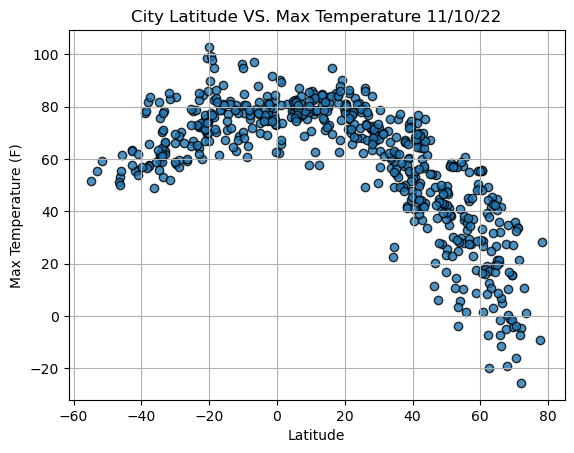

In [15]:
# import time module
import time

#Build the scatter plot for lat vs. Max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", 
           linewidths=1,
           marker="o",
           alpha=0.8, 
           label="Cities")

# Imcorporate the other graph properties
plt.title(f"City Latitude VS. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

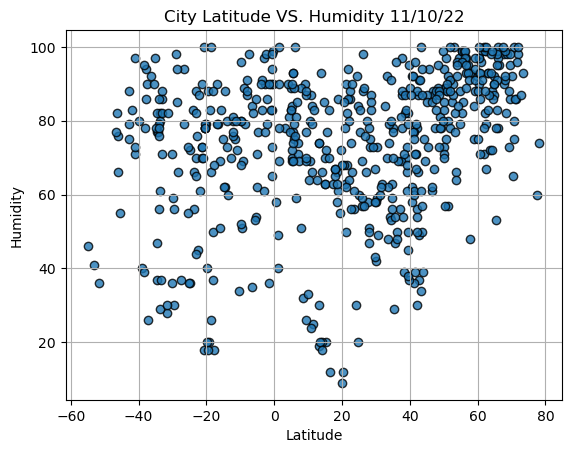

In [16]:
#Build the scatter plot for lat vs. Humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", 
           linewidths=1,
           marker="o",
           alpha=0.8, 
           label="Cities")

# Imcorporate the other graph properties
plt.title(f"City Latitude VS. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

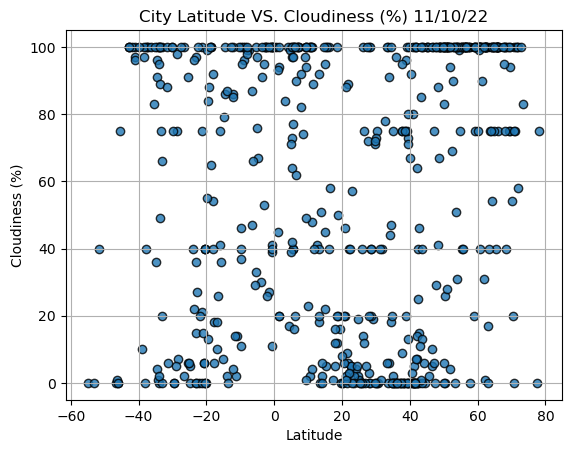

In [17]:
#Build the scatter plot for lat vs. Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", 
           linewidths=1,
           marker="o",
           alpha=0.8, 
           label="Cities")

# Imcorporate the other graph properties
plt.title(f"City Latitude VS. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

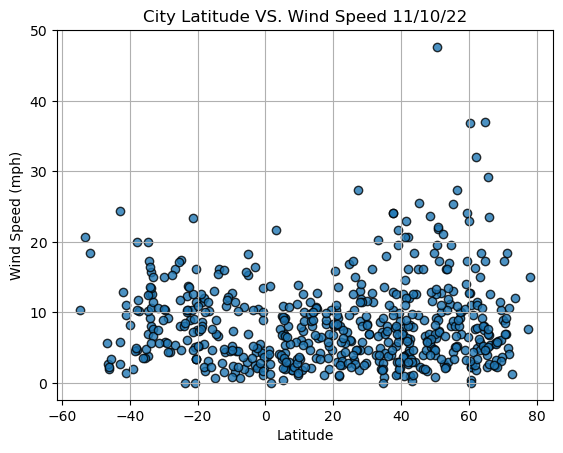

In [18]:
#Build the scatter plot for lat vs. Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", 
           linewidths=1,
           marker="o",
           alpha=0.8, 
           label="Cities")

# Imcorporate the other graph properties
plt.title(f"City Latitude VS. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()

In [19]:
# Import lineregress
from scipy.stats import linregress

In [20]:
# Create a functtion to perform linear regression on the weather data
# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
     # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
## NOTICE : NO OUTPUT until we call the function with five parameters

In [21]:
# Use loc to specify a certain row from a current DF 
# row = df.loc[row_index]
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2022-11-10 18:43:20
Lat                      -34.5322
Lng                       20.0403
Max Temp                    61.12
Humidity                       77
Cloudiness                      4
Wind Speed                  19.93
Name: 13, dtype: object

In [22]:
#Filter DF based on a value of a row
#Filter all northern hemisphere latitudes (greater than or equal to 0)
# Boolian - returns: true/ false

city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
566    False
567    False
568     True
569    False
570     True
Name: Lat, Length: 571, dtype: bool

In [23]:
# to return a DF with all data fitting the criteria use loc on df
# inside brackets add conditional filter
# add head to see DF
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-11-10 18:43:13,-23.1203,-134.9692,72.25,88,97,12.39
1,Tskaltubo,GE,2022-11-10 18:43:14,42.3254,42.5979,50.94,87,40,4.61
2,Ponta Do Sol,PT,2022-11-10 18:43:14,32.6667,-17.1000,70.72,84,78,3.91
3,Port Alfred,ZA,2022-11-10 18:43:15,-33.5906,26.8910,62.19,82,100,8.01
4,Faanui,PF,2022-11-10 18:43:16,-16.4833,-151.7500,78.85,79,26,10.27


In [24]:
len(city_data_df)

571

In [25]:
# assign DF to the variable to access teh data to perform linear regression
# Create Northern and Sothern Hemisphere DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <=0)]

# Now we can perform linear regression
                                     

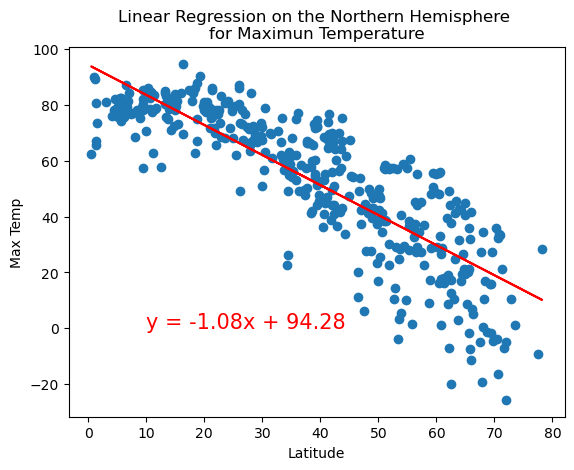

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
#the last part (10,-20) is the text coordinates
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n'
                       'for Maximun Temperature', 'Max Temp', (10, 0))



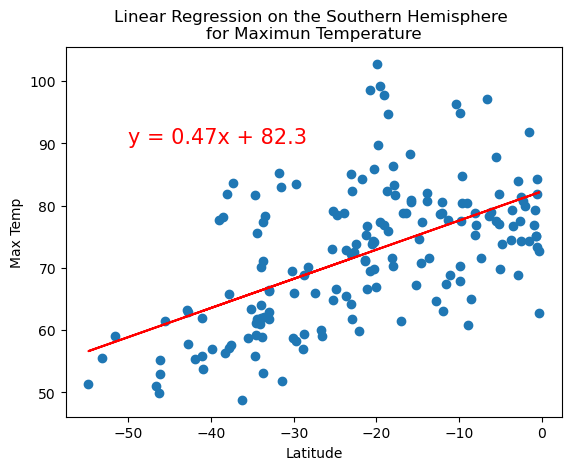

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
#the last part (10,-20) is the text coordinates
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n'
                       'for Maximun Temperature', 'Max Temp', (-50, 90))



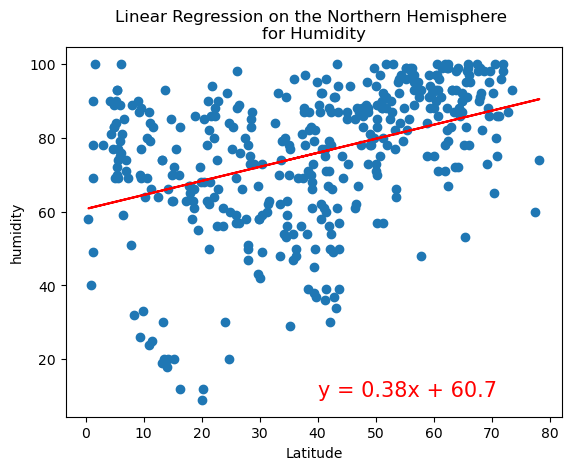

In [38]:
# Linear regression on Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Humidity', 'humidity', (40, 10))
                       

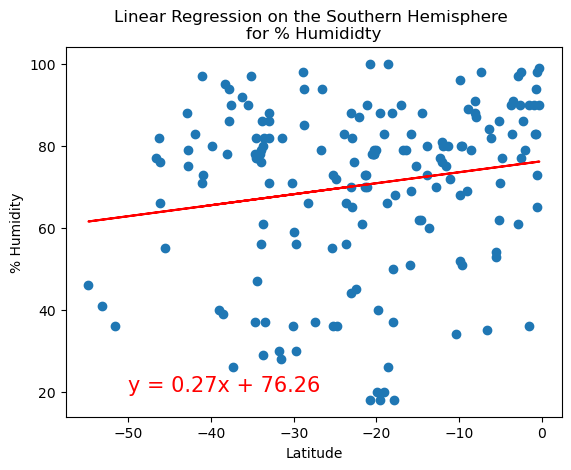

In [37]:
# Linear regression on Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for % Humididty', '% Humidity', (-50, 20))

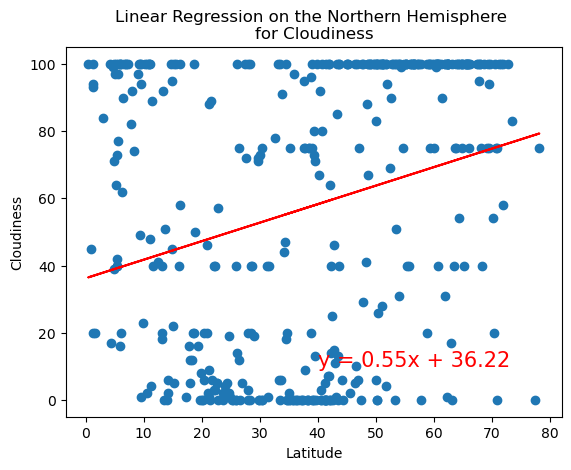

In [41]:
# Linear regression on Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Cloudiness', 'Cloudiness', (40, 10))

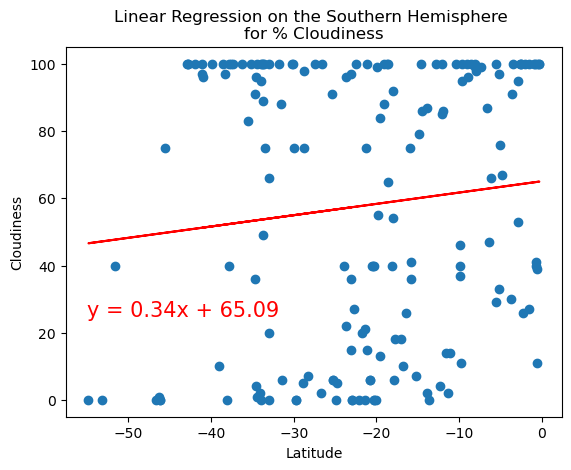

In [44]:
# Linear regression on Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for % Cloudiness', 'Cloudiness', (-55, 25))

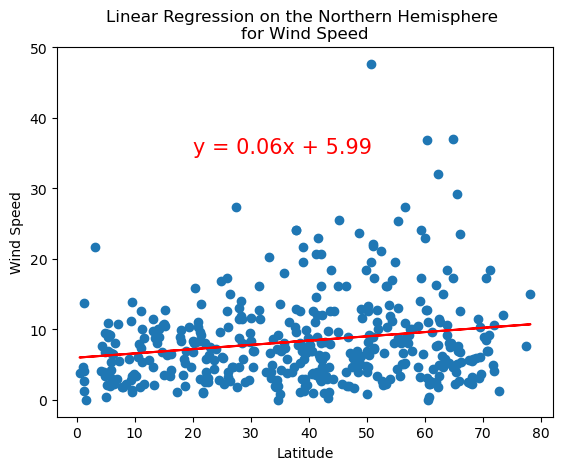

In [47]:
# Linear regression on Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Wind Speed', 'Wind Speed', (20, 35))

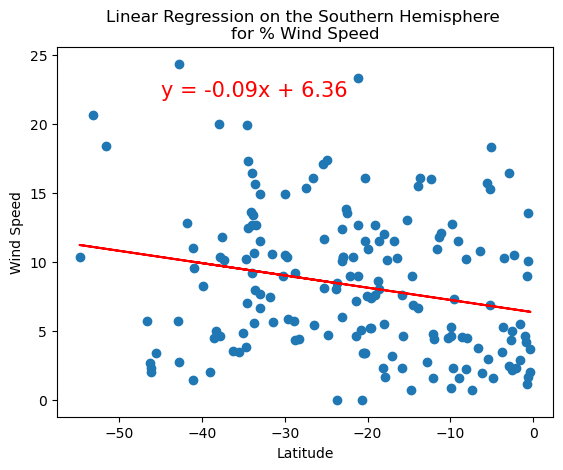

In [50]:
# Linear regression on Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for % Wind Speed', 'Wind Speed', (-45, 22))